In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [93]:
# Start session
# sess = tf.Session()

# Generate non-linear moon-shape like data
(x_vals, y_vals) = datasets.make_moons(n_samples=350, noise=.20, random_state=0)

In [94]:
y_vals = np.array([1 if y == 1 else -1 for y in y_vals])
class1_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class1_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == 1]
class2_x = [x[0] for i, x in enumerate(x_vals) if y_vals[i] == -1]
class2_y = [x[1] for i, x in enumerate(x_vals) if y_vals[i] == -1]

In [95]:
y_vals = y_vals.astype(np.float32)
y_vals = y_vals[:, np.newaxis]
x_vals = x_vals.astype(np.float32)

In [96]:
y_vals.shape

(350, 1)

In [97]:
x_vals.shape

(350, 2)

In [98]:
num_features = x_vals.shape[1]

In [91]:
tf.reset_default_graph()
with tf.device('/cpu:0'):
    max_test = tf.maximum(1,[0,3], name='max_test')
with tf.Session() as sess:
    print(sess.run(max_test))

[1 3]


In [99]:
# TODO START YOUR CODE HERE
# Initialize placeholders
tf.reset_default_graph()
with tf.device('/cpu:0'):
    # Create variables for svm
    x_data = tf.placeholder(x_vals.dtype, (None, num_features), 'features')
    y_target = tf.placeholder(y_vals.dtype, (None, 1), 'label')
    b = tf.get_variable('intercept', (1), x_vals.dtype, initializer=tf.zeros_initializer()) # intercept (bias)
    Theta = tf.get_variable('theta', (num_features, 1), x_vals.dtype, initializer=tf.zeros_initializer()) # theta
    
    # Build an SVM Model
    h = tf.subtract(tf.matmul(x_data, Theta), b)
    loss = tf.reduce_mean(tf.maximum(.0, tf.subtract(1., tf.multiply(y_target, h))))
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loss, feed_dict={x_data: x_vals, y_target: y_vals}))

1.0


In [ ]:


# Build an SVM Model


# Define loss function
loss = None

# Define prediction function
prediction = None

# Define optimizer and train step
my_opt = None
train_step = None

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# To store values of the loss function at each iteration
losses = []

# Save graph to the file to inspect with tensorboard
writer = tf.summary.FileWriter("./logs/", tf.get_default_graph())

# END YOUR CODE HERE

# Training loop
for i in range(500):
    sess.run(train_step, feed_dict={x_data: x_vals, y_target: y_vals[:, np.newaxis]})

    current_loss = sess.run(loss, feed_dict={x_data: x_vals, y_target: y_vals[:, np.newaxis]})
    losses.append(current_loss)

    if i == 0 or (i + 1) % 100 == 0:
        print("Epoch %d, Loss = %.2f" % (i + 1, current_loss))

In [3]:
writer = tf.summary.FileWriter('./data/.graph', tf.get_default_graph())
with tf.Session() as sess:
    
writer.close()

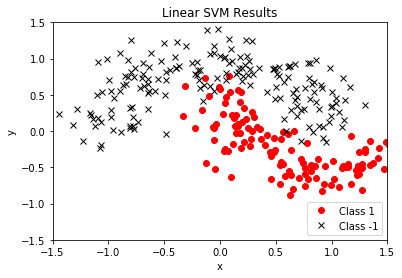

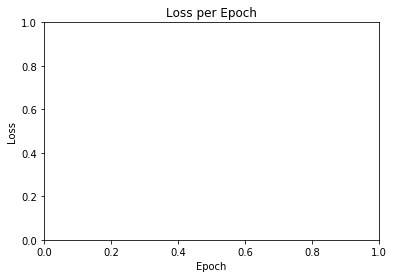

In [10]:
# Create a mesh to plot points and predictions
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xrange, yrange = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
# Form a grid by taking each point point from x and y range
grid = np.c_[xrange.ravel(), yrange.ravel()]
grid = grid.astype(float)
# Make predictions for each point of the grid
# [grid_predictions] = sess.run(prediction, feed_dict={x_data: grid})
# grid_predictions = grid_predictions.reshape(xrange.shape)

# Plot initial points and color grid points according to the prediction made for each point
# plt.contourf(xrange, yrange, grid_predictions, cmap='copper', alpha=0.8)
plt.plot(class1_x, class1_y, 'ro', label='Class 1')
plt.plot(class2_x, class2_y, 'kx', label='Class -1')
plt.title('Linear SVM Results')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.show()

# Plot loss over time
# plt.plot(losses, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()